In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df_cleaned=pd.read_csv("cleaned.csv")

In [ ]:
df_cleaned = df_cleaned.reindex(np.random.permutation(df_cleaned.index))
df_cleaned['LABEL'] = 0

In [ ]:
df_cleaned

,Unnamed: 0,text,dialect,LABEL
39899,39899,كوكي الا تسنيتها بقيتي هه,MA,0
2638,2638,كل عام وانتي معاي وتسحنيلي في كبدي لكن انحبك,LY,0
67318,67318,بس مالها علاقه بالاخلاق موسي,EG,0
83817,83817,والله اكتر حد زعلان عليه لاننا شايفين فيك نجم ...,EG,0
130832,130832,ليش ما فكر فيهن قبل مطالبن محقه بس مطالبنا كما...,LB,0
...,...,...,...,...
92723,92723,لما مطروح زحمه القاهره والمنصوره يبقوا ايه مشك...,EG,0
119742,119742,انا ما بضحك لرغيف السخن هلا الصراحه ممكن اضحك ...,LB,0
133323,133323,ليكم حق تتخلعوا سنه عايشين في الظلام نور الشمس...,SD,0
106696,106696,بس كاتب كلام حلو بعدان الشي يجي بالفطره,LB,0


In [ ]:


from tensorflow.keras.utils import to_categorical

#One-hot encode the lab

df_cleaned.loc[df_cleaned['dialect']== 'LY', 'LABEL'] = 0
df_cleaned.loc[df_cleaned['dialect']== 'LB', 'LABEL'] = 1
df_cleaned.loc[df_cleaned['dialect']=='EG', 'LABEL'] = 2
df_cleaned.loc[df_cleaned['dialect']=='SD', 'LABEL'] = 3
df_cleaned.loc[df_cleaned['dialect']=='MA', 'LABEL'] = 4

print(df_cleaned['LABEL'][:10])
labels = to_categorical(df_cleaned['LABEL'], num_classes=5)
print(labels[:10])
if 'dialect' in df_cleaned.keys():
    df_cleaned.drop(['dialect'], axis=1)

39899     4
2638      0
67318     2
83817     2
130832    1
98357     2
132823    1
36658     4
90441     2
133576    3
Name: LABEL, dtype: int64
[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [ ]:
df_cleaned.head(10)

,Unnamed: 0,text,dialect,LABEL
39899,39899,كوكي الا تسنيتها بقيتي هه,MA,4
2638,2638,كل عام وانتي معاي وتسحنيلي في كبدي لكن انحبك,LY,0
67318,67318,بس مالها علاقه بالاخلاق موسي,EG,2
83817,83817,والله اكتر حد زعلان عليه لاننا شايفين فيك نجم ...,EG,2
130832,130832,ليش ما فكر فيهن قبل مطالبن محقه بس مطالبنا كما...,LB,1
98357,98357,الق نظره علي تغريده وده للاخ السوري اللي عاملي...,EG,2
132823,132823,الله يرحمه ويرحم كل الشهداء مثواهم الجنه ويطول...,LB,1
36658,36658,فيه واحد الغرينطا ديال الطالياان,MA,4
90441,90441,يخربيت الحشيش اللي نساك انك زملكاوي بس تحيه لي...,EG,2
133576,133576,انا حكيت االقصه دي ليه عشان الفي الفيديو دا نت...,SD,3


In [ ]:
df["text"].values

array(['الحكومه بالقش العملتو ده زي الزول المريض وببلع في بندول دايرين علاج المسكن حدو قريب',
       'ايوا كده يا بت هه',
       'بس انا اعرف ستات هناك شغاله في شركه واحده وفيها رجاله والعكس',
       ..., 'حاجات واجد معش فرقت معايا زي زمان',
       'عشان الارهابي يتطور ويتحول لانتحاري محتاج شهور تدريب اخوه ومراته وامه وابوه واولاده كانوا فين في الفتره دي ماسالوش جاب الفلوس منين',
       'حسن راتب المرتاب ف امره جايب الاخواني الملزق عمرو خالد ف رمضان ح نقاطع المحور وناخد الداءري'],
      dtype=object)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

n_most_common_words = 20000
max_len = 250
tokenizer = Tokenizer(num_words=n_most_common_words)
df_cleaned["text"] = df_cleaned["text"].astype(str)
tokenizer.fit_on_texts(df_cleaned["text"].values)
sequences = tokenizer.texts_to_sequences(df_cleaned["text"].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

Found 214681 unique tokens.


In [ ]:
print('Shape of data tensor:', X.shape)

Shape of data tensor: (147725, 250)


In [ ]:
print('Shape of label tensor:', labels.shape)

Shape of label tensor: (147725, 5)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.1, random_state=42)

In [ ]:
epochs = 10
emb_dim = 128
batch_size = 256
labels[:2]

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from keras.callbacks import EarlyStopping



print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())

((132952, 250), (132952, 5), (14773, 250), (14773, 5))
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 128)          2560000   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 250, 128)          0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 2609733 (9.96 MB)
Trainable params: 2609733 (9.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [33]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=6, min_delta=0.0001)])

Epoch 1/10
416/416 [==============================] - 696s 2s/step - loss: 0.7655 - acc: 0.7258 - val_loss: 0.5657 - val_acc: 0.8046
Epoch 2/10
416/416 [==============================] - 689s 2s/step - loss: 0.6033 - acc: 0.7894 - val_loss: 0.5140 - val_acc: 0.8205
Epoch 3/10
416/416 [==============================] - 677s 2s/step - loss: 0.5356 - acc: 0.8131 - val_loss: 0.4973 - val_acc: 0.8279
Epoch 4/10
416/416 [==============================] - 677s 2s/step - loss: 0.4919 - acc: 0.8298 - val_loss: 0.4850 - val_acc: 0.8319
Epoch 5/10
416/416 [==============================] - 676s 2s/step - loss: 0.4565 - acc: 0.8427 - val_loss: 0.4886 - val_acc: 0.8327
Epoch 6/10
416/416 [==============================] - 675s 2s/step - loss: 0.4320 - acc: 0.8506 - val_loss: 0.4947 - val_acc: 0.8325
Epoch 7/10
416/416 [==============================] - 675s 2s/step - loss: 0.4108 - acc: 0.8575 - val_loss: 0.4966 - val_acc: 0.8340
Epoch 8/10
416/416 [==============================] - 673s 2s/step - 

In [34]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

462/462 [==============================] - 30s 64ms/step - loss: 0.5068 - acc: 0.8323
Test set
  Loss: 0.507
  Accuracy: 0.832


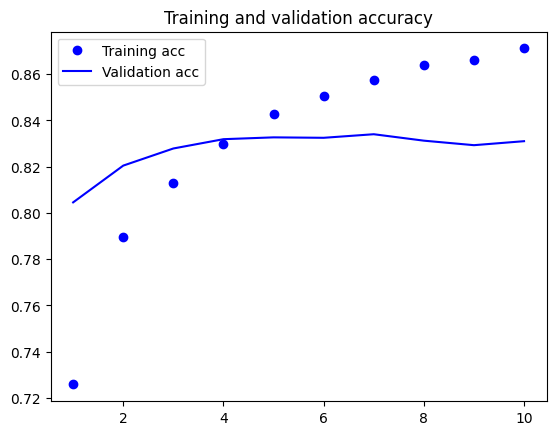

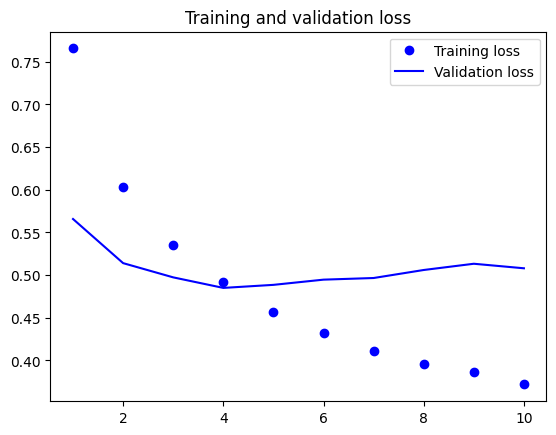

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [36]:
txt = ["تسلم ايديك علي صينية بطاطس"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
labels = ['LY','LB','EG','SD','MA']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 285ms/step
[[0.0077839  0.00177138 0.9872212  0.00195786 0.00126569]] EG


In [37]:
txt = ["التسويها بايدك تغلب اجاويدك"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
labels = ['LY','LB','EG','SD','MA']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 41ms/step
[[0.23095402 0.23260735 0.13920777 0.34750938 0.04972154]] SD


In [38]:
import pickle

In [39]:
with open("LSTM_model.pkl","wb") as file:
  pickle.dump(model,file)

